# ***Libraries & Tools***

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint 
import time
import json
import math
import re
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, classification_report, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTEN, SMOTENC, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from itertools import product
from scipy.stats import randint

# ***Data Overview and Exploration***

## Data Overview

In [2]:
data = pd.read_csv('MMSA_2021.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227792 entries, 0 to 227791
Columns: 152 entries, DISPCODE to MMSANAME
dtypes: float64(151), object(1)
memory usage: 264.2+ MB


In [4]:
data.head()

,DISPCODE,STATERE1,CELPHON1,LADULT1,COLGSEX,LANDSEX,RESPSLCT,SAFETIME,CADULT1,CELLSEX,...,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_MMSA,_MMSAWT,SEQNO,MMSANAME
0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,10100.0,90.030265,2.021000e+09,"b'Aberdeen, SD, Micropolitan Statistical Area'"
1,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,10100.0,29.643176,2.021000e+09,"b'Aberdeen, SD, Micropolitan Statistical Area'"
2,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,10100.0,37.000680,2.021000e+09,"b'Aberdeen, SD, Micropolitan Statistical Area'"
3,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,10100.0,49.702755,2.021000e+09,"b'Aberdeen, SD, Micropolitan Statistical Area'"
4,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,10100.0,15.396983,2.021000e+09,"b'Aberdeen, SD, Micropolitan Statistical Area'"


In [5]:
# Some columns have many null values
isna_data = data.isna().sum()
for column, count in isna_data.items():
    print(f"{column}: {count}")

DISPCODE: 0
STATERE1: 172268
CELPHON1: 172268
LADULT1: 172268
COLGSEX: 227774
LANDSEX: 204447
RESPSLCT: 196968
SAFETIME: 55524
CADULT1: 55524
CELLSEX: 55525
HHADULT: 55525
SEXVAR: 0
GENHLTH: 2
PHYSHLTH: 2
MENTHLTH: 0
POORHLTH: 104941
PRIMINSR: 1
PERSDOC3: 0
MEDCOST1: 1
CHECKUP1: 0
EXERANY2: 0
BPHIGH6: 0
BPMEDS: 143010
CHOLCHK3: 0
TOLDHI3: 29849
CHOLMED3: 30130
CVDINFR4: 0
CVDCRHD4: 0
CVDSTRK3: 0
ASTHMA3: 0
ASTHNOW: 195581
CHCSCNCR: 0
CHCOCNCR: 0
CHCCOPD3: 0
ADDEPEV3: 0
CHCKDNY2: 0
DIABETE4: 0
DIABAGE3: 199821
HAVARTH5: 0
ARTHEXER: 158813
ARTHEDU: 158813
LMTJOIN3: 158813
ARTHDIS2: 158813
JOINPAI2: 158813
MARITAL: 1
EDUCA: 0
RENTHOM1: 1
NUMHHOL3: 172269
NUMPHON3: 211707
CPDEMO1B: 170
VETERAN3: 949
EMPLOY1: 2047
CHILDREN: 3540
INCOME3: 5154
PREGNANT: 182883
WEIGHT2: 6747
HEIGHT3: 7408
DEAF: 8316
BLIND: 8973
DECIDE: 9547
DIFFWALK: 10201
DIFFDRES: 10646
DIFFALON: 11222
SMOKE100: 12001
SMOKDAY2: 145458
USENOW3: 12408
ECIGNOW1: 13013
ALCDAY5: 13868
AVEDRNK3: 113057
DRNK3GE5: 113425
MAXDRNKS: 

In [5]:
# If we were to drop all null values, the data would have no records left
data.dropna().shape

(0, 152)

## Hand-pick Variables
Select some interesting columns from the dataset.

#### Columns

In [3]:
columns = [
    # === List with all meaningful columns ===
    [
        # Sec 1 Health Status
        '_RFHLTH',

        # Sec 2 Healthy Days
        '_PHYS14D',
        '_MENT14D',

        # Sec 3 Health Care Access
        '_HLTHPLN',
        '_HCVU652',

        # Sec 4 Exercise
        '_TOTINDA',

        # Sec 5 Hypertension Awareness
        '_RFHYPE6',

        # Sec 6 Cholesterol Awareness
        '_CHOLCH3',
        '_RFCHOL3',

        # Sec 7 Chronic Health Conditions
        '_MICHD',

        # Sec 8 Arthritis
        '_DRDXAR3',
        '_LMTACT3',
        '_LMTWRK3',

        # Sec 11 Tobacco Use
        '_SMOKER3',
        '_RFSMOK3',
        '_CURECI1',

        # Sec 12 Alcohol Consumption
        'DRNKANY5',
        'ALCDAY5',
        '_RFBING5',
        '_DRNKWK1',
        '_RFDRHV7',

        # Sec 14 HIV/AIDS
        '_AIDTST4',

        # Sec 15 Fruits & Vegetables
        'FTJUDA2_',
        'FRUTDA2_',
        'GRENDA1_',
        'FRNCHDA_',
        'POTADA1_',
        'VEGEDA2_',
        '_FRUTSU1',
        '_VEGESU1',
        '_FRTLT1A',
        '_VEGLT1A',
        
        # Sec 9 Demographics
        '_INCOMG1',
        '_EDUCAG',
        'CHILDREN',
        '_RFBMI5',
        '_BMI5CAT',
        '_BMI5',
        'WTKG3',
        'HEIGHT3',
        '_AGE_G',
        '_AGE80',
        '_AGE65YR',
        '_AGEG5YR',
        '_SEX',
        '_RACEPRV',
        '_RACEGR3',
        '_RACEG21',
        '_RACE',
        '_HISPANC',
        '_MRACE1',
        '_PRACE1'
    ],

    # === 1st subset of all the meaningful columns === 
    [
        # Sec 1 Health Status
        '_RFHLTH',

        # Sec 2 Healthy Days
        '_PHYS14D',
        '_MENT14D',

        # Sec 3 Health Care Access
        '_HLTHPLN',
        '_HCVU652',

        # Sec 4 Exercise
        '_TOTINDA',

        # Sec 5 Hypertension Awareness
        '_RFHYPE6',

        # Sec 6 Cholesterol Awareness
        '_CHOLCH3',
        '_RFCHOL3',

        # Sec 7 Chronic Health Conditions
        '_MICHD',

        # Sec 8 Arthritis

        # Sec 11 Tobacco Use
        '_SMOKER3',

        # Sec 12 Alcohol Consumption
        '_RFBING5',
        '_RFDRHV7',

        # Sec 14 HIV/AIDS
        '_AIDTST4',

        # Sec 15 Fruits & Vegetables
        '_FRUTSU1',
        '_VEGESU1',
        
        # Sec 9 Demographics
        '_INCOMG1',
        '_EDUCAG',
        '_RFBMI5',
        '_BMI5CAT',
        '_AGE_G',
        '_SEX',
        '_RACE'
    ],


    # === 2nd subset of all the meaningul columns ===
    [
        # Sec 1 Health Status
        '_RFHLTH',

        # Sec 2 Healthy Days
        '_PHYS14D',
        '_MENT14D',

        # Sec 3 Health Care Access
        '_HLTHPLN',
        '_HCVU652',

        # Sec 4 Exercise
        '_TOTINDA',

        # Sec 5 Hypertension Awareness
        '_RFHYPE6',

        # Sec 6 Cholesterol Awareness
        '_CHOLCH3',
        '_RFCHOL3',

        # Sec 7 Chronic Health Conditions
        '_MICHD',

        # Sec 8 Arthritis
        

        # Sec 11 Tobacco Use
        '_SMOKER3',

        # Sec 12 Alcohol Consumption
        '_RFBING5',
        '_RFDRHV7',

        # Sec 14 HIV/AIDS
        '_AIDTST4',

        # Sec 15 Fruits & Vegetables
        '_FRTLT1A',
        '_VEGLT1A',
        
        # Sec 9 Demographics
        '_INCOMG1',
        '_EDUCAG',
        '_RFBMI5',
        '_BMI5CAT',
        '_AGE_G',
        '_SEX',
        '_RACE'
    ]
]

#### Categorical and Continuous Columns
We can use the one hot encoder to properly encode the values of each categorical variable that exhibits no apparent order.

In [4]:
"""

1: For categorical
2: For continuous

"""

cat_con_variables = {
    # Sec 1 Health Status
    '_RFHLTH': 1,

    # Sec 2 Healthy Days
    '_PHYS14D': 1,
    '_MENT14D': 1,

    # Sec 3 Health Care Access
    '_HLTHPLN': 1,
    '_HCVU652': 1,

    # Sec 4 Exercise
    '_TOTINDA': 1,

    # Sec 5 Hypertension Awareness
    '_RFHYPE6': 1,

    # Sec 6 Cholesterol Awareness
    '_CHOLCH3': 1,
    '_RFCHOL3': 1,

    # Sec 7 Chronic Health Conditions
    '_MICHD': 1,

    # Sec 8 Arthritis
    '_DRDXAR3': 1,
    '_LMTACT3': 1,
    '_LMTWRK3': 1,

    # Sec 11 Tobacco Use
    '_SMOKER3': 1,
    '_RFSMOK3': 1,
    '_CURECI1': 1,

    # Sec 12 Alcohol Consumption
    'DRNKANY5': 1,
    'ALCDAY5': 2,
    '_RFBING5': 1,
    '_DRNKWK1': 2,
    '_RFDRHV7': 1,

    # Sec 14 HIV/AIDS
    '_AIDTST4': 1,

    # Sec 15 Fruits & Vegetables
    'FTJUDA2_': 2,
    'FRUTDA2_': 2,
    'GRENDA1_': 2,
    'FRNCHDA_': 2,
    'POTADA1_': 2,
    'VEGEDA2_': 2,
    '_FRUTSU1': 2,
    '_VEGESU1': 2,
    '_FRTLT1A': 1,
    '_VEGLT1A': 1,
    
    # Sec 9 Demographics
    '_INCOMG1': 1,
    '_EDUCAG': 1,
    'CHILDREN': 1,
    '_RFBMI5': 1,
    '_BMI5CAT': 1,
    '_BMI5': 2,
    'WTKG3': 2,
    'HEIGHT3': 2,
    
    # === The age variables can remain the same because their values represent a natural ordering ===
    '_AGE_G': 1,
    '_AGE80': 1,
    '_AGE65YR': 1,
    '_AGEG5YR': 1,
    
    '_SEX': 1,
    '_RACEPRV': 1,
    '_RACEGR3': 1,
    '_RACEG21': 1,
    '_RACE': 1,
    '_HISPANC': 1,
    '_MRACE1': 1,
    '_PRACE1': 1
}

#### Column Values that are Irrelevant
Some columns/variables have values, such as "Dont Know/Not Sure", that are irrelevant to the analysis. These values are included in data mining methods but can be ignored in NLP mehtods. NLP methods handle text sequences of varying forms.

In [5]:
irrel_col_values = {
    # Sec 1 Health Status
    '_RFHLTH': 9,

    # Sec 2 Healthy Days
    '_PHYS14D': 9,
    '_MENT14D': 9,

    # Sec 3 Health Care Access
    '_HLTHPLN': 9,
    '_HCVU652': 9,

    # Sec 4 Exercise
    '_TOTINDA': 9,

    # Sec 5 Hypertension Awareness
    '_RFHYPE6': 9,

    # Sec 6 Cholesterol Awareness
    '_CHOLCH3': 9,
    '_RFCHOL3': 9,

    # Sec 7 Chronic Health Conditions

    # Sec 8 Arthritis
    '_LMTACT3': 9,
    '_LMTWRK3': 9,

    # Sec 11 Tobacco Use
    '_SMOKER3': 9,
    '_RFSMOK3': 9,
    '_CURECI1': 9,

    # Sec 12 Alcohol Consumption
    'DRNKANY5': 9,
    'ALCDAY5': 900,
    '_RFBING5': 9,
    '_DRNKWK1': 99900,
    '_RFDRHV7': 9,

    # Sec 14 HIV/AIDS
    '_AIDTST4': 9,

    # Sec 15 Fruits & Vegetables
    '_FRTLT1A': 9,
    '_VEGLT1A': 9,
    
    # Sec 9 Demographics
    '_INCOMG1': 9,
    '_EDUCAG': 9,
    'CHILDREN': 9,
    '_RFBMI5': 9,
    '_AGE65YR': 3,
    '_AGEG5YR': 14,
    '_RACEGR3': 9,
    '_RACEG21': 9,
    '_RACE': 9,
    '_HISPANC': 9,
    '_MRACE1': [77,99],
    '_PRACE1': [77, 99]
}

In [6]:
for column, values in irrel_col_values.items():
    if isinstance(values, int):  
        num_rows = len(data[data[column] == values])
        print(f"Number of rows with value {values} in column '{column}': {num_rows}")
    elif isinstance(values, list):  
        num_rows = len(data[data[column].isin(values)])
        print(f"Number of rows with values in {values} in column '{column}': {num_rows}")

# Calculating the size of the dataset after removing rows with specified values
filtered_data = data.copy() 
for column, values in irrel_col_values.items():
    if isinstance(values, int):  
        filtered_data = filtered_data[filtered_data[column] != values]
    elif isinstance(values, list):  
        filtered_data = filtered_data[~filtered_data[column].isin(values)]

# Calculate the size of the filtered dataset
filtered_size = filtered_data.shape[0]
print(f"Size of the dataset after removing rows with specified values: {filtered_size}")

Number of rows with value 9 in column '_RFHLTH': 601
Number of rows with value 9 in column '_PHYS14D': 4691
Number of rows with value 9 in column '_MENT14D': 4011
Number of rows with value 9 in column '_HLTHPLN': 9341
Number of rows with value 9 in column '_HCVU652': 83992
Number of rows with value 9 in column '_TOTINDA': 454
Number of rows with value 9 in column '_RFHYPE6': 1031
Number of rows with value 9 in column '_CHOLCH3': 15155
Number of rows with value 9 in column '_RFCHOL3': 1639
Number of rows with value 9 in column '_LMTACT3': 712
Number of rows with value 9 in column '_LMTWRK3': 1664
Number of rows with value 9 in column '_SMOKER3': 14005
Number of rows with value 9 in column '_RFSMOK3': 14005
Number of rows with value 9 in column '_CURECI1': 13478
Number of rows with value 9 in column 'DRNKANY5': 15146
Number of rows with value 900 in column 'ALCDAY5': 0
Number of rows with value 9 in column '_RFBING5': 19641
Number of rows with value 99900 in column '_DRNKWK1': 19412
Numb

Some columns described in the 2021 SMART City and Country CodeBook are derived from other columns in the dataset.

- DROCDY3_ Calculated variable for drink-occasions-per-day. DROCDY3_ is derived from ALCDAY5 by dividing the ALCDAY5 variable by 7 days per week or 30 days per month.

- _CHLDCNT Calculated variable for number of children in household. _CHLDCNT is derived from CHILDREN.

- HTM4 Calculated variable for reported height in meters. HTM4 is derived from the variable HTIN4 by multiplying HTIN4 by 2.54 cm per in and dividing by 100 cm per meter. HTM4 is derived from HEIGHT2 metric values by dividing by 100.

- HTIN4 Calculated variable for reported height in inches. HTIN4 is derived from HEIGHT3. HTIN4 is calculated by adding the foot portion of HEIGHT3 multiplied by 12, to the inch portion. 

## Candidate Dataframe Creation

In [ ]:
# Check if the columns selected earlier exist in the dataset
for col in columns[0]:
    if col in data.columns:
        print(col)
    else:
        print(f'{col} does not exist')

In [62]:
# How many null values each selected column has
isna_data = data[columns[0]].isna().sum()
for column, count in isna_data.items():
    print(f"{column}: {count}")

_RFHLTH: 0
_PHYS14D: 0
_MENT14D: 0
_HLTHPLN: 0
_HCVU652: 0
_TOTINDA: 0
_RFHYPE6: 0
_CHOLCH3: 0
_RFCHOL3: 29981
_MICHD: 2308
_DRDXAR3: 1480
_LMTACT3: 1480
_LMTWRK3: 1480
_SMOKER3: 0
_RFSMOK3: 0
_CURECI1: 0
DRNKANY5: 0
ALCDAY5: 13868
_RFBING5: 0
_DRNKWK1: 0
_RFDRHV7: 0
_AIDTST4: 17092
FTJUDA2_: 24654
FRUTDA2_: 24097
GRENDA1_: 24449
FRNCHDA_: 24886
POTADA1_: 26756
VEGEDA2_: 26817
_FRUTSU1: 27859
_VEGESU1: 32613
_FRTLT1A: 0
_VEGLT1A: 0
_INCOMG1: 0
_EDUCAG: 0
CHILDREN: 3540
_RFBMI5: 0
_BMI5CAT: 26341
_BMI5: 26341
WTKG3: 22711
HEIGHT3: 7408
_AGE_G: 0
_AGE80: 0
_AGE65YR: 0
_AGEG5YR: 0
_SEX: 0
_RACEPRV: 0
_RACEGR3: 0
_RACEG21: 0
_RACE: 0
_HISPANC: 0
_MRACE1: 0
_PRACE1: 0


In [6]:
# Create dataframes based on the selected columns
# Question: Should we drop the rows with null values?
dataframes = [
    data[columns[0]].dropna().copy(),
    data[columns[1]].dropna().copy(),
    data[columns[2]].dropna().copy(),
]

In [ ]:
object_cols = []
for col, cat_con_var in cat_con_variables.items():
    if cat_con_var == 1:
        object_cols.append(col)

print(f'Categorical Columns: \n{object_cols}')

In [7]:
for dataframe in dataframes:
    dataframe['_MICHD'] = dataframe['_MICHD'].replace({1.0: 1, 2.0: 2})
    dataframe['_MICHD'] = dataframe['_MICHD'].astype('int64')

    # Convert categorical columns to integers
    for column, col_type in cat_con_variables.items():
        if col_type == 1 and (column in dataframe.columns):  # Check if the column is categorical
            dataframe[column] = dataframe[column].astype('int64')

    # Use this if you want to utilize the one hot encoder
    # The one hot encoder will create sub-variables for each distinct value of a variable
    #dataframe = pd.get_dummies(dataframe, columns=object_cols)

In [8]:
dataframes[0]['_MICHD'].value_counts()

_MICHD
2    141513
1     12410
Name: count, dtype: int64

In [18]:
dataframes[0].shape

(153923, 52)

In [13]:
# Print the total number of duplicates for one of the categories of variable "_MICHD"
dataframes[2][dataframes[2]['_MICHD'] == 2].duplicated().sum()

32930

### Dataset Sample Creation
Create a sample for one of the dataframes for later feature extraction. Another method we can use to take a sample is to split the original dataframe and apply a combination of oversampling and undersampling to the training set.

First way to create a sample: 
- Take all the samples from the minority class
- Define a percentage of samples that you want to take and subtract the number of minority class samples; that will be the number of majority class samples

In [48]:
minority_samples = dataframes[0][dataframes[0]['_MICHD'] == 1.0]

num_minority_samples = len(minority_samples)
num_majority_samples =  math.floor(dataframes[0].shape[0] * 0.3) - num_minority_samples

majority_unique_samples = dataframes[0][dataframes[0]['_MICHD'] == 2.0].drop_duplicates()
num_unique_majority_samples = len(majority_unique_samples)

majority_samples = majority_unique_samples.sample(n=num_majority_samples)

dataframe_sample = pd.concat([minority_samples, majority_samples])

Second way to create a sample:
- Perform stratified sampling using a percentage of samples

In [ ]:
# Specify the fraction of samples you want to retain in the subset (e.g., 0.5 for 50%)
subset_fraction = 0.25

# Perform stratified sampling to create a smaller dataframe
dataframe_sample = dataframes[0].groupby('_MICHD', group_keys = False).apply(lambda x: x.sample(frac = subset_fraction))

In [49]:
dataframe_sample.shape

(46176, 52)

In [50]:
dataframe_sample['_MICHD'].value_counts()

_MICHD
2    33766
1    12410
Name: count, dtype: int64

In [13]:
dataframe_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15458 entries, 22120 to 8977
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _RFHLTH   15458 non-null  float64
 1   _PHYS14D  15458 non-null  float64
 2   _MENT14D  15458 non-null  float64
 3   _HCVU652  15458 non-null  float64
 4   _TOTINDA  15458 non-null  float64
 5   _RFHYPE6  15458 non-null  float64
 6   _CHOLCH3  15458 non-null  float64
 7   _RFCHOL3  15458 non-null  float64
 8   _MICHD    15458 non-null  float64
 9   _SMOKER3  15458 non-null  float64
 10  _RFBING5  15458 non-null  float64
 11  _RFDRHV7  15458 non-null  float64
 12  _AIDTST4  15458 non-null  float64
 13  _FRUTSU1  15458 non-null  float64
 14  _VEGESU1  15458 non-null  float64
 15  _INCOMG1  15458 non-null  float64
 16  _EDUCAG   15458 non-null  float64
 17  _RFBMI5   15458 non-null  float64
 18  _BMI5CAT  15458 non-null  float64
 19  _AGE_G    15458 non-null  float64
 20  _SEX      15458 non-null  floa

## Feature Selection with SVM
Feature selection with a linear SVM is time consuming. However, we can use undersampling to take all the instances of the minority class and reduce the size of the majority class. Use this methodology only if you want to improve the results of the classification.

In [6]:
def calc_cost(y_true, y_pred, cost_matrix):
    conf = confusion_matrix(y_true,y_pred).T
    return np.sum(conf * cost_matrix)

In [77]:
def find_best_params(estimator, params, train_set, validation_set, starting_point = 0):
    train_x = train_set[0]
    train_y = train_set[1]
    test_x = validation_set[0]
    test_y = validation_set[1]
    
    min_cost = np.inf
    best_params = {}  
    full_params_set = []
    
    if type(params) == dict:
        
        for values in product(*params.values()):
            point = dict(zip(params.keys(), values))
            full_params_set.append(point)
        
    elif type(params) == list:
        
        for params_subset in params:
            for values in product(*params_subset.values()):
                point = dict(zip(params_subset.keys(), values))
                full_params_set.append(point)
    
    else:
        return []
    
    steps = len(full_params_set)
    counter = starting_point
    print(f"Testing {steps} models in total.")
    start = time.time()
    
    performance_log = []
    
    for params in full_params_set[starting_point:]:

        estimator.set_params(**params)
        estimator.fit(train_x,train_y)
        pred_y = estimator.predict(test_x)
        cost_matrix = np.matrix([[0,1], [40,0]])
        cost = calc_cost(test_y, pred_y, cost_matrix)

        if cost < min_cost:
            min_cost = cost
            best_params = params
        
        log = f"{counter}/{steps} | Cost: {cost} | Elapsed: {int((time.time()-start)*100)/100}s | {params}"
        performance_log.append(log)
        print("________________________________________________________________________________________")
        print(log)
        print("________________________________________________________________________________________")
        counter += 1
        if counter % 10 == 0:
            with open("Performance_Logs.txt", "w") as f:
                f.write("\n".join(performance_log))

    return best_params

In [17]:
linear_params = {"C":[0.1,1.0,10.0,100.0],"kernel":["linear"]}

# If the columns are all of type float, then there is no need to apply label encoding
#LE = LabelEncoder()
#data_encoded = dataframe_sample.apply(LE.fit_transform, axis = 1)

target_column = "_MICHD"

y = dataframe_sample[target_column]
x = dataframe_sample.drop(columns = [target_column])

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20)
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size = 0.25)

In [ ]:
best_params = find_best_params(SVC(), linear_params, [x_train, y_train], [x_val, y_val])

In [ ]:
print(best_params)

In [ ]:
classifier = SVC(*best_params)
classifier.fit(x_train, y_train)
weights = zip(list(data.columns),classifier.coef_.todense().data)
weights_sorted = {k: v for k, v in sorted(weights.items(), key=lambda item: item[1])}
with open("Important_Features.json","w") as f:
    json.dump(weights_sorted,f)

## Feature Selection with Random Forests
We can use the GridSearch, or the RandomizedSearch method with the Random Forest algorithm to evaluate the importance of each variable and identify the optimal features for assessing the risk of MI or CHD.

In [51]:
target_column = "_MICHD"

y = dataframe_sample[target_column]
x = dataframe_sample.drop(columns = [target_column])

In [52]:
# Define the cost matrix
cost_matrix = [[0, 0.25],  # Cost of false negative 
               [1, 0]]  # Cost of false positive

In [53]:
# Define a custom scoring function using the cost matrix
def custom_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cost = np.sum(cm * cost_matrix)
    return -cost  # Minimize cost, so negative of cost is returned

In [54]:
# Make the custom scoring function into a scorer object
custom_scorer = make_scorer(custom_score, greater_is_better = False)

### Random Search

In [55]:
# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 21)),
    'min_samples_split': randint(2, 11)
}

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with custom scoring
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, 
                                   scoring=custom_scorer, n_jobs=4, random_state=42)


### Grid Search

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=4, scoring=custom_scorer)


### Initialize search, output the best parameters, and print feature importance

In [56]:
random_search.fit(x, y)
#grid_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=4,
                   param_distributions={'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792d986f2080>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792d98506a10>},
                   random_state=42,
                   scoring=make_scorer(custom_score, greater_is_better=False, response_method='predict'))

In [58]:
# Get the best parameters from the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best estimator (Random Forest classifier with the best parameters)
best_rf_classifier = random_search.best_estimator_

# Train the best classifier on the entire dataset
best_rf_classifier.fit(x, y)

# Extract feature importance
feature_importances = best_rf_classifier.feature_importances_

Best Parameters: {'max_depth': 19, 'min_samples_split': 9, 'n_estimators': 70}


Print the importance of each feature if original unaltered variables are used.

In [59]:
# Print all features and their importance scores
print("\nFeature Importance:")
for feature, importance in zip(x.columns, feature_importances):
    print(f"{feature}: {importance}")


Feature Importance:
_RFHLTH: 0.059078359278274144
_PHYS14D: 0.02442186158342125
_MENT14D: 0.011579076044032013
_HLTHPLN: 0.0033895501269200785
_HCVU652: 0.014564756331303034
_TOTINDA: 0.007997931771532215
_RFHYPE6: 0.055155960891758136
_CHOLCH3: 0.0012639240670698404
_RFCHOL3: 0.03367317298017319
_DRDXAR3: 0.010126543855978273
_LMTACT3: 0.01189494568859544
_LMTWRK3: 0.014579616203637343
_SMOKER3: 0.016901999973661857
_RFSMOK3: 0.004779899865860209
_CURECI1: 0.0021898871382454326
DRNKANY5: 0.005786126884919146
ALCDAY5: 0.01883939881186808
_RFBING5: 0.0034576734022927296
_DRNKWK1: 0.02165858167122022
_RFDRHV7: 0.0027468852940699963
_AIDTST4: 0.009260131523649767
FTJUDA2_: 0.022553894001121573
FRUTDA2_: 0.026130163804587096
GRENDA1_: 0.028590851698487484
FRNCHDA_: 0.02834947122901776
POTADA1_: 0.02993928545272123
VEGEDA2_: 0.027084317511321575
_FRUTSU1: 0.03447702852817967
_VEGESU1: 0.04378899497119232
_FRTLT1A: 0.004067714936235357
_VEGLT1A: 0.0037632422359381015
_INCOMG1: 0.02617421513

Print the importance of each feature if one hot encoder is used.

In [ ]:
feature_importance_sum = {}

for feature, importance in zip(x.columns, feature_importances):
    feature_name = re.sub(r'^(.*?)_.+', r'\1', feature)

    if feature_name in feature_importance_sum:
        feature_importance_sum[feature_name] += importance
    else:
        feature_importance_sum[feature_name] = importance

sorted_feature_importance_sum = sorted(feature_importance_sum.items(), key=lambda x: x[1], reverse=True)

for feature, importance_sum in sorted_feature_importance_sum:
    print(f"{feature}: {importance_sum}")

Print the top features if original unaltered variables are used.

In [60]:
num_top_features = 20  # You can adjust this number based on your preference
top_feature_indices = feature_importances.argsort()[-num_top_features:][::-1]
top_features = x.columns[top_feature_indices]

print("Top features:")
for feature in top_features:
    print(feature)

Top features:
_AGE80
_RFHLTH
_RFHYPE6
_BMI5
_AGEG5YR
_VEGESU1
_AGE_G
WTKG3
_FRUTSU1
HEIGHT3
_RFCHOL3
POTADA1_
GRENDA1_
FRNCHDA_
VEGEDA2_
_INCOMG1
FRUTDA2_
_PHYS14D
FTJUDA2_
_SEX


Print the top features if one hot encoder is used.

In [ ]:
top_features = [sorted_feature_importance_sum[i][0] for i in range(13)]

complete_features = []

for feature in top_features:
  for column in dataframe_sample.columns:
      if column.startswith(feature):
          suffix = column[len(feature):].lstrip('_')
          if suffix != '':
            complete_part = feature + '_' + suffix
          else:
            complete_part = feature

          complete_features.append(complete_part)

top_features = complete_features
for complete_feat in top_features: print(complete_feat)

# ***Classification with Data Mining Methods***

## Class Frequency of the Target Variable

<Axes: xlabel='_MICHD', ylabel='count'>

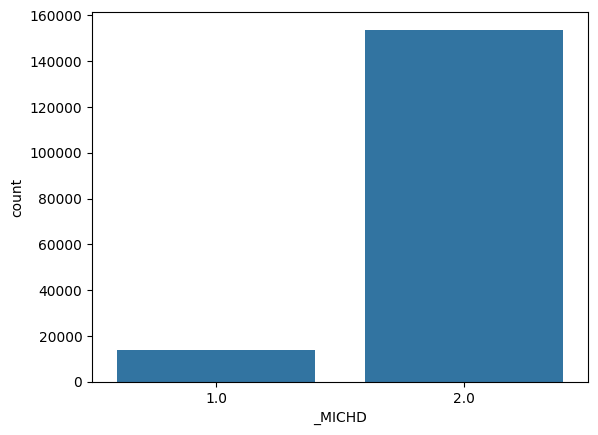

In [78]:
# Counts for the "Had_CHD_MI" variable
sns.countplot(data=dataframes[2],x='_MICHD')

## Generation of Synthetic Data

### Borderline SMOTE

In [156]:
SMOTE_data = dataframes[2].copy()

In [135]:
SMOTE_data['_MICHD'].value_counts()

_MICHD
2.0    153711
1.0     13872
Name: count, dtype: int64

In [147]:
SMOTE_data.drop_duplicates()['_MICHD'].value_counts()

_MICHD
2.0    120396
1.0     12908
Name: count, dtype: int64

#### Split data before applying Borderline SMOTE

In [ ]:
SMOTE_train_data, SMOTE_test_data = train_test_split(SMOTE_data, test_size=0.20, stratify=SMOTE_data['_MICHD'])

In [157]:
# Separate the dataframe into minority and majority classes
minority_df = SMOTE_data[SMOTE_data['_MICHD'] == 1.0]
majority_df = SMOTE_data[SMOTE_data['_MICHD'] == 2.0]

# Split the minority class into training and testing sets
minority_train, minority_test = train_test_split(minority_df, test_size=0.1)

# Split the majority class into training and testing sets
majority_train, majority_test = train_test_split(majority_df, test_size=0.3)

# Concatenate the training and testing sets for both classes
train_set = pd.concat([minority_train, majority_train])
test_set = pd.concat([minority_test, majority_test])

# Shuffle the rows in the testing set
test_set = test_set.sample(frac=1)

# Ensure that the testing set does not contain samples from the training set
test_set = test_set[~test_set.index.isin(train_set.index)]

# Verify the class distribution in the training and testing sets
print("Training set class distribution:")
print(train_set['_MICHD'].value_counts())
print("\nTesting set class distribution:")
print(test_set['_MICHD'].value_counts())

Training set class distribution:
_MICHD
2.0    107597
1.0     12484
Name: count, dtype: int64

Testing set class distribution:
_MICHD
2.0    46114
1.0     1388
Name: count, dtype: int64


In [158]:
# Generate synthetic data for the original imbalanced data
resampled_data = BorderlineSMOTE().fit_resample(train_set.drop(columns = ['_MICHD']), 
                                        train_set['_MICHD'])
train_set = resampled_data[0]
train_set[target_column] = resampled_data[1].to_numpy()

<Axes: xlabel='_MICHD', ylabel='count'>

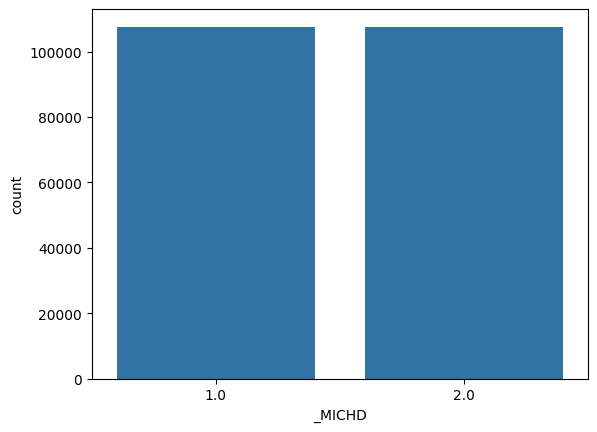

In [159]:
# Counts for the "Had_CHD_MI" variable
sns.countplot(data=train_set,x='_MICHD')

In [160]:
# 0: Reported having MI or CHD
# 1: Did not report having MI or CHD

train_set['_MICHD'] = train_set['_MICHD'].map({1.0: 0, 2.0: 1})
test_set['_MICHD'] = test_set['_MICHD'].map({1.0: 0, 2.0: 1})

#### Apply Borderline SMOTE without spliting data

In [121]:
# Generate synthetic data for the original imbalanced data
resampled_data = BorderlineSMOTE().fit_resample(SMOTE_data.drop(columns = ['_MICHD']), 
                                        SMOTE_data['_MICHD'])
SMOTE_data = resampled_data[0]
SMOTE_data[target_column] = resampled_data[1].to_numpy()

<Axes: xlabel='_MICHD', ylabel='count'>

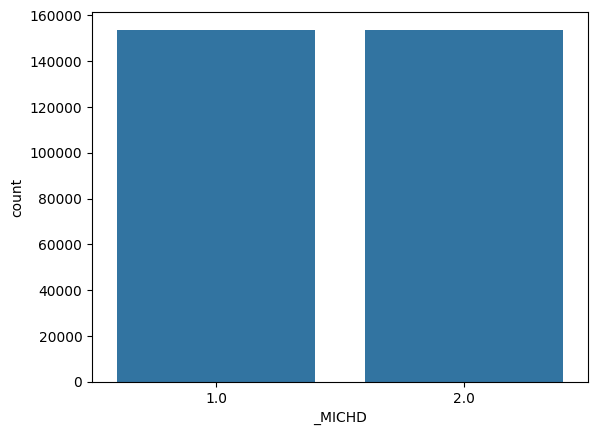

In [122]:
# Counts for the "Had_CHD_MI" variable
sns.countplot(data=SMOTE_data,x='_MICHD')

In [123]:
# 0: Reported having MI or CHD
# 1: Did not report having MI or CHD

SMOTE_data['_MICHD'] = SMOTE_data['_MICHD'].map({1.0: 0, 2.0: 1})

## Classification

### XGBoost

#### XGBoost for pre-split data

In [162]:
# Define the cost matrix
cost_matrix = [[0, 1],  
               [0.15, 0]] 

# Calculate the scale_pos_weight based on the corrected cost matrix
scale_pos_weight = cost_matrix[1][0] / cost_matrix[0][1]

# Create an XGBClassifier object
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, scale_pos_weight=scale_pos_weight)

# Train the classifier
xgb.fit(train_set.drop(columns=['_MICHD']), train_set['_MICHD'])

# Predict the response for test dataset
y_pred = xgb.predict(test_set.drop(columns=['_MICHD']))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(test_set['_MICHD'], y_pred))

Confusion Matrix:
[[ 1071   317]
 [12565 33549]]


#### XGBoost for non-split data

In [125]:
# Split the balanced dataset to a set of training and testing samples 
x_train, x_test, y_train, y_test = train_test_split(SMOTE_data.drop(columns=['_MICHD']), SMOTE_data['_MICHD'], test_size=0.25)

In [133]:
# Define the cost matrix
cost_matrix = [[0, 1],  
               [0.20, 0]] 

# Calculate the scale_pos_weight based on the corrected cost matrix
scale_pos_weight = cost_matrix[1][0] / cost_matrix[0][1]


# Create an XGBClassifier object
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, scale_pos_weight=scale_pos_weight)


# Train the classifier
xgb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = xgb.predict(x_test)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[37154  1389]
 [ 7298 31015]]


# ***Classification with NLP Methods***

## Convert Original Data to Text Sequences

### Sentences from Variable Values
Create a small sentence from each variable value according to the 2021 SMART BRFSS Survey Codebook

In [14]:
sequences = {
    # Sec 1 Health Status
    '_RFHLTH': {
        1: "i think my health is good or very good",
        2: "i think my health is fair or poor"
    },

    # Sec 2 Healthy Days
    '_PHYS14D': {
        1: "my health has not been good for zero days",
        2: "my health has not been good for 1-13 days",
        3: "my health has not been good for 14 or more days"
    },

    '_MENT14D': {
        1: "my mental health has not been good for zero days",
        2: "my mental health has not been good for 1-13 days",
        3: "my mental health has not been good for 14 or more days"
    },

    # Sec 3 Health Care Access
    '_HLTHPLN': {
        1: "i had some form of health insurance",
        2: "i didn't have some form of health insurance"
    },

    '_HCVU652': {
        1: "i have some form of health insurance",
        2: "i don't have some form of health insurance"
    },

    # Sec 4 Exercise
    '_TOTINDA': {
        1: "i have exercised during the past 30 days",
        2: "i haven't exercised during the past 30 days"
    },

    # Sec 5 Hypertension Awareness
    '_RFHYPE6': {
        1: "i haven't been told that my blood pressure is high",
        2: "i have been told that my blood pressure is high"
    },

    # Sec 6 Cholesterol Awareness
    '_CHOLCH3': {
        1: "i have had my cholesterol checked within the past five years",
        2: "i haven't had my cholesterol checked within the past five years",
        3: "i have never had my cholesterol checked"
    },

    '_RFCHOL3': {
        1: "i have checked my cholesterol and it's not high",
        2: "i have checked my cholesterol and it's high"
    },

    # Sec 7 Chronic Health Conditions
    

    # Sec 8 Arthritis
    

    # Sec 11 Tobacco Use
    '_SMOKER3': {
        1: "i smoke every day",
        2: "i smoke some days",
        3: "i'm a former smoker",
        4: "i've never smoked"
    },

    # Sec 12 Alcohol Consumption
    '_RFBING5': {
        1: "i didn't drink in the past 30 days, but if i did, i didn't drink five or more drinks on an occasion",
        2: "i did drink in the past 30 days and had five or more drinks on one or more occasions in the past month"
    },

    '_RFDRHV7': {
        1: "i'm not a heavy drinker",
        2: "i'm a heavy drinker"
    },

    # Sec 14 HIV/AIDS
    '_AIDTST4': {
        1: "i have been tested for HIV",
        2: "i haven't been tested for HIV"
    },

    # Sec 15 Fruits & Vegetables
    '_FRTLT1A': {
        1: "i eat fruits one or more times per day",
        2: "i don't eat fruits one or more times per day"
    },

    '_VEGLT1A': {
        1: "i eat vegetables one or more times per day",
        2: "i don't eat vegetables one or more times per day"
    },
    
    # Sec 9 Demographics
    '_INCOMG1': {
        1: "my inclome is less than 15,000",
        2: "my income ranges from 15,000 to 25,000",
        3: "my income ranges from 25,000 to 35,000",
        4: "my income ranges from 35,000 to 50,000",
        5: "my income ranges from 50,000 to 100,000",
        6: "my income ranges from 100,000 to 200,000",
        7: "my income ranges from 200,000 and higher"
    },

    '_EDUCAG': {
        1: "i didn't graduate high school",
        2: "i graduated high school",
        3: "i attended college",
        4: "i graduated from college"
    },

    '_RFBMI5': {
        1: "my BMI is less than 25.00",
        2: "my BMI is greater than 25.00"
    },

    '_BMI5CAT': {
        1: "i am underweight",
        2: "my weight is normal",
        3: "i am overweight",
        4: "i am obese"
    },

    '_AGE_G': {
        1: "my age is 18 to 24",
        2: "my age is 25 to 34",
        3: "my age is 35 to 44",
        4: "my age is 45 to 54",
        5: "my age is 55 to 64",
        6: "my age is 65 or older",
    },

    '_SEX': {
        1: "i'm a male",
        2: "i'm a female"
    },

    '_RACE': {
        1: "i'm white",
        2: "i'm black",
        3: "i'm american indian or alaskan",
        4: "i'm asian",
        5: "i'm native hawaiian or other pacific islander",
        6: "i belong to some other race",
        7: "i'm multiracial",
        8: "i'm hispanic"
    }
}

Target Variable: '_MICHD': {
        1: "i had MI or CHD",
        2: "i haven't had MI or CHD"
    },

### String Variable Values
In the 2021 SMART BRFSS Codebook there are numerical values that correspond to string values, which represent a short description of the variable. The description of each variable value is used to create the small sentence. Here, we use the corresponding string value.

In [51]:
string_var_values = {
    # Sec 1 Health Status
    '_RFHLTH': {
        1: "Good or Better Health",
        2: "Fair or Poor Health"
    },

    # Sec 2 Healthy Days
    '_PHYS14D': {
        1: "Zero days when physical health not good",
        2: "1-13 days when physical health not good",
        3: "14+ days when physical health not good"
    },

    '_MENT14D': {
        1: "Zero days when mental health not good",
        2: "1-13 days when mental health not good",
        3: "14+ days when mental health not good"
    },

    # Sec 3 Health Care Access
    '_HLTHPLN': {
        1: "Have some form of insurance",
        2: "Do not have some form of health insurance"
    },

    '_HCVU652': {
        1: "Have some form of health insurance",
        2: "Do not have any form of health insurance"
    },

    # Sec 4 Exercise
    '_TOTINDA': {
        1: "Had physical activity or exercise",
        2: "No physical activity or exercise in last 30 days"
    },

    # Sec 5 Hypertension Awareness
    '_RFHYPE6': {
        1: "_RFHYPE6-No",
        2: "_RFHYPE6-Yes"
    },

    # Sec 6 Cholesterol Awareness
    '_CHOLCH3': {
        1: "Had cholesterol checked in past 5 years",
        2: "Did not have cholesterol checked in past 5 years",
        3: "Have never had cholesterol checked"
    },

    '_RFCHOL3': {
        1: "_RFCHOL3-No",
        2: "_RFCHOL3-Yes"
    },

    # Sec 7 Chronic Health Conditions
    

    # Sec 8 Arthritis
    

    # Sec 11 Tobacco Use
    '_SMOKER3': {
        1: "Current smoker-now smokes every day",
        2: "Current smoker-now smokes some days",
        3: "Former smoker",
        4: "Never smoked"
    },

    # Sec 12 Alcohol Consumption
    '_RFBING5': {
        1: "_RFBING5-No",
        2: "_RFBING5-Yes"
    },

    '_RFDRHV7': {
        1: "_RFDRHV7-No",
        2: "_RFDRHV7-Yes"
    },

    # Sec 14 HIV/AIDS
    '_AIDTST4': {
        1: "_AIDTST4-Yes",
        2: "_AIDTST4-No"
    },

    # Sec 15 Fruits & Vegetables
    '_FRTLT1A': {
        1: "Consumed fruit one or more times per day",
        2: "Consumed fruit less than one time per day"
    },

    '_VEGLT1A': {
        1: "Consumed vegetables one or more times per day",
        2: "Consumed vegetables less than one time per day"
    },
    
    # Sec 9 Demographics
    '_INCOMG1': {
        1: "Less than $15,000",
        2: "$15,000 to less than $25,000",
        3: "$25,000 to less than $35,000",
        4: "$35,000 to less than $50,000",
        5: "$50,000 to less than $100,000",
        6: "$100,000 to less than $200,000",
        7: "$200,000 or more"
    },

    '_EDUCAG': {
        1: "Did not graduate High School",
        2: "Graduated High School",
        3: "Attended College or Technical School",
        4: "Graduated from College or Technical School"
    },

    '_RFBMI5': {
        1: "_RFBMI5-No",
        2: "_RFBMI5-Yes"
    },

    '_BMI5CAT': {
        1: "Underweight",
        2: "Normal Weight",
        3: "Overweight",
        4: "Obese"
    },

    '_AGE_G': {
        1: "my age is 18 to 24",
        2: "my age is 25 to 34",
        3: "my age is 35 to 44",
        4: "my age is 45 to 54",
        5: "my age is 55 to 64",
        6: "my age is 65 or older",
    },

    '_SEX': {
        1: "Male",
        2: "Female"
    },

    '_RACE': {
        1: "White only, non-Hispanic",
        2: "Black only, non-Hispanic",
        3: "American Indian or Alaskan Native only, Non-Hispanic",
        4: "Asian only, non-Hispanic",
        5: "Native Hawaiian or other Pacific Islander only, Non-Hispanic",
        6: "Other race only, non-Hispanic",
        7: "Multiracial, non-Hispanic",
        8: "Hispanic"
    }
}

Target Variable: '_MICHD': {
        1: "Reported having MI or CHD",
        2: "Did not report having MI or CHD"
    },

### New Text Dataset Creation
We create text datasets based on the transformation of the numerical values to string/text values. Two datasets will be created:
- Dataset A: This dataset will transform each variable value into a small sentence
- Dataset B: This dataset will transform each variable value into its corresponding text value, according to the text values provided in "2021 SMART BRFSS Survey Codebook".

The following algorithm implements the generation of text sequences from the original data.

In [52]:
# Create an empty list to store rows for the two datasets
new_dataset_rows = [
    [],
    []
]

# Create an empty list to store the two datasets
text_data = []

# Iterate through each row in the original dataset
for _, row in dataframes[2].iterrows():
    sentence_parts = [
        [],  # To store parts of the sentence for each row for dataset A
        []   # To store parts of the sentence for each row for dataset B
    ]

    # Iterate through each column in the original dataset
    for column_name, value in row.items():
        # Check if the current column is in the sequences dictionary. Both the sequences and the string_var_values dictionaries have the same keys.
        if (column_name in sequences) and (value in sequences[column_name]):

            # === Dataset A ===
            # Get the description for the current value of the variable
            description = sequences[column_name].get(value, '')
            # Add a comma to the end of the description
            description += ','
            # Add the description to the sentence parts for dataset A
            sentence_parts[0].append(description)

            # === Dataset B ===
            # Get the description for the current value of the variable
            description = string_var_values[column_name].get(value, '')
            # Add a comma to the end of the description
            description += ','
            # Add the description to the sentence parts for dataset B
            sentence_parts[1].append(description)
        
        # Check if the current column is the target variable
        elif column_name == '_MICHD':
            # Add the target variable's value to the second column of both datasets
            classification_value = value
    
    # === Dataset A ===
    # Concatenate the sentence parts into a single sentence
    sentence = ' '.join(sentence_parts[0])
    
    # Create a new row for dataset A
    new_dataset_rows[0].append({'Sentence': sentence, 'Classification': classification_value})

    # === Dataset B ===
    # Concatenate the sentence parts into a single sentence 
    sentence = ' '.join(sentence_parts[1])
    
    # Create a new row for dataset B
    new_dataset_rows[1].append({'Sentence': sentence, 'Classification': classification_value})

# Create the new dataset from the list of rows
text_data.append(pd.DataFrame(new_dataset_rows[0]))
text_data.append(pd.DataFrame(new_dataset_rows[1]))

# Display dataset A
print(text_data[0])

print()

# Display dataset B
print(text_data[1])

                                                 Sentence  Classification
0       i think my health is good or very good, my hea...               2
1       i think my health is good or very good, my hea...               2
2       i think my health is good or very good, my hea...               2
3       i think my health is good or very good, my hea...               2
4       i think my health is good or very good, my hea...               2
...                                                   ...             ...
167578  i think my health is fair or poor, my health h...               1
167579  i think my health is good or very good, my hea...               2
167580  i think my health is good or very good, my hea...               2
167581  i think my health is good or very good, my hea...               2
167582  i think my health is good or very good, my hea...               2

[167583 rows x 2 columns]

                                                 Sentence  Classification
0       Go

In [53]:
# Capitalize the "i" in the beginning of each sentence, remove the comma from the end fo the sentence and replace it with a period.
text_data[0]['Sentence'] = text_data[0]['Sentence'].str.rstrip(',')  # Remove comma from the end
text_data[0]['Sentence'] = text_data[0]['Sentence'].str.capitalize()  # Capitalize "I" at the beginning
text_data[0]['Sentence'] = text_data[0]['Sentence'].str.replace(r'\bi\b', 'I')  # Capitalize standalone "i"
text_data[0]['Sentence'] = text_data[0]['Sentence'] + '.'  # Replace comma with a period at the end

In [54]:
print(text_data[0])

                                                 Sentence  Classification
0       I think my health is good or very good, my hea...               2
1       I think my health is good or very good, my hea...               2
2       I think my health is good or very good, my hea...               2
3       I think my health is good or very good, my hea...               2
4       I think my health is good or very good, my hea...               2
...                                                   ...             ...
167578  I think my health is fair or poor, my health h...               1
167579  I think my health is good or very good, my hea...               2
167580  I think my health is good or very good, my hea...               2
167581  I think my health is good or very good, my hea...               2
167582  I think my health is good or very good, my hea...               2

[167583 rows x 2 columns]


In [55]:
text_data[1]['Sentence'] = text_data[1]['Sentence'].str.rstrip(',')  # Remove comma from the end

In [ ]:
# Based on the value (custom sentence, string/text), convert the "_MICHD" target variable values to 1 and 0
text_data['Classification'] = text_data['Classification'].map({'Yes': 1, 'No': 0})

In [48]:
text_data[0]['Classification'].value_counts()

Classification
2    153711
1     13872
Name: count, dtype: int64

In [49]:
text_data[1]['Classification'].value_counts()

Classification
2    153711
1     13872
Name: count, dtype: int64

In [56]:
# Save the new sentence dataset. This dataset will be used for sequence classification tasks.
text_data[1].to_excel("Text_Sequence_Dataset.xlsx",  index=False)

## Synthetic Text Generation

## Classification using Multinomial Naive Bayes Classifiers

In [25]:
# We can add the "NOT_" word infront of words that come after negation words
def add_not_to_words(sentence):
    words = sentence.split()
    new_sentence = []

    add_not = False

    for word in words:
        if add_not:
            new_sentence.append("NOT_" + word)
            # Stop adding "NOT_" when a comma is encountered
            if "," in word:
                add_not = False
        else:
            new_sentence.append(word)

        if word.lower() in ['not', "didn't", "don't", "haven't", "never"]:
            add_not = True

    return ' '.join(new_sentence)

In [24]:
negation_text_data = text_data[0].copy()

In [26]:
# Apply the function to every sentence in the DataFrame
negation_text_data['Sentence'] = negation_text_data['Sentence'].apply(add_not_to_words)

In [28]:
COST = [
    [0, 1],
    [0.25, 0]
]

### Multinomial NB


In [30]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(negation_text_data['Sentence'], negation_text_data['Classification'], test_size=0.25, random_state=42, stratify=negation_text_data['Classification'])

weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 1)] = 1
weights[np.where(y_train == 2)] = 0.25

# Create a CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(x_train_vectorized, y_train, sample_weight=weights)

# Make predictions on the test set
y_pred = clf.predict(x_test_vectorized)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}\n')

# Calculate the total cost
total_cost = np.sum(conf_matrix * COST)
print(f'Total Cost: {total_cost}\n')


# Evaluate the performance
classification_rep = classification_report(y_test, y_pred)

# Display the results
print('Classification Report:')
print(classification_rep)

Confusion Matrix: 
[[ 2492   976]
 [11362 27066]]

Total Cost: 3816.5

Classification Report:
              precision    recall  f1-score   support

           1       0.18      0.72      0.29      3468
           2       0.97      0.70      0.81     38428

    accuracy                           0.71     41896
   macro avg       0.57      0.71      0.55     41896
weighted avg       0.90      0.71      0.77     41896



### Multi-variate Bernoulli NB


In [31]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(negation_text_data['Sentence'], negation_text_data['Classification'], test_size=0.25, random_state=42, stratify=negation_text_data['Classification'])

weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 1)] = 1
weights[np.where(y_train == 2)] = 0.25

# Create a CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Train a Multinomial Naive Bayes classifier
clf = BernoulliNB()
clf.fit(x_train_vectorized, y_train, sample_weight=weights)

# Make predictions on the test set
y_pred = clf.predict(x_test_vectorized)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}\n')

# Calculate the total cost
total_cost = np.sum(conf_matrix * COST)
print(f'Total Cost: {total_cost}\n')


# Evaluate the performance
classification_rep = classification_report(y_test, y_pred)

# Display the results
print('Classification Report:')
print(classification_rep)

Confusion Matrix: 
[[ 2520   948]
 [12371 26057]]

Total Cost: 4040.75

Classification Report:
              precision    recall  f1-score   support

           1       0.17      0.73      0.27      3468
           2       0.96      0.68      0.80     38428

    accuracy                           0.68     41896
   macro avg       0.57      0.70      0.54     41896
weighted avg       0.90      0.68      0.75     41896



### Binary Multinomail NB

In [33]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(negation_text_data['Sentence'], negation_text_data['Classification'], test_size=0.25, random_state=42, stratify=negation_text_data['Classification'])

weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 1)] = 5
weights[np.where(y_train == 2)] = 0.25

# Create a CountVectorizer to convert the text data into numerical features
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train.apply(lambda x: ' '.join(set(x.split()))))
x_test_vectorized = vectorizer.transform(x_test.apply(lambda x: ' '.join(set(x.split()))))

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(x_train_vectorized, y_train, sample_weight=weights)

# Make predictions on the test set
y_pred = clf.predict(x_test_vectorized)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}\n')

# Calculate the total cost
total_cost = np.sum(conf_matrix * COST)
print(f'Total Cost: {total_cost}\n')


# Evaluate the performance
classification_rep = classification_report(y_test, y_pred)

# Display the results
print('Classification Report:')
print(classification_rep)

Confusion Matrix: 
[[ 2656   812]
 [13125 25303]]

Total Cost: 4093.25

Classification Report:
              precision    recall  f1-score   support

           1       0.17      0.77      0.28      3468
           2       0.97      0.66      0.78     38428

    accuracy                           0.67     41896
   macro avg       0.57      0.71      0.53     41896
weighted avg       0.90      0.67      0.74     41896

